In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime as dt
import seaborn as sns
from datetime import datetime, date, timedelta
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

In [2]:
df= pd.read_excel(r'C:\Users\basia\OneDrive\Pulpit\sdu shit\thesis\READY DATASETS\median.xlsx')
df.head()


,datetime,Origin,Day,Month,Week,Weekday,Hour,Minute,Price,Output
0,2022-01-01 15:00:00,1,1,1,1,1,15,0,349.0,55
1,2022-01-01 16:15:00,0,1,1,1,1,16,15,349.0,25
2,2022-01-02 07:00:00,1,2,1,1,2,7,0,399.0,44
3,2022-01-02 08:15:00,0,2,1,1,2,8,15,399.0,13
4,2022-01-02 15:15:00,1,2,1,52,6,15,15,399.0,25


In [3]:
df.shape

(4099, 10)

In [4]:
df['Origin'] = df['Origin'].astype(float)
df['Week'] = df['Week'].astype(float)
df['datetime'] = pd.to_datetime(df['datetime'])
print(df.dtypes)



datetime    datetime64[ns]
Origin             float64
Day                  int64
Month                int64
Week               float64
Weekday              int64
Hour                 int64
Minute               int64
Price              float64
Output               int64
dtype: object


In [5]:
df.head()

,datetime,Origin,Day,Month,Week,Weekday,Hour,Minute,Price,Output
0,2022-01-01 15:00:00,1.0,1,1,1.0,1,15,0,349.0,55
1,2022-01-01 16:15:00,0.0,1,1,1.0,1,16,15,349.0,25
2,2022-01-02 07:00:00,1.0,2,1,1.0,2,7,0,399.0,44
3,2022-01-02 08:15:00,0.0,2,1,1.0,2,8,15,399.0,13
4,2022-01-02 15:15:00,1.0,2,1,52.0,6,15,15,399.0,25


In [5]:
X=df.iloc[:,1:-1]
y=df.iloc[:,-1]


In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42)

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense, Dropout

model = Sequential()
model.add(Dense(64, input_dim=8, activation='relu'))
#model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
#model.add(Dropout(0.2))
model.add(Dense(1))


# Compile model
model.compile(loss='mean_squared_error', optimizer='adam')

# Train model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=150, batch_size=32)

# Evaluate model on test data
test_loss = model.evaluate(X_test, y_test)

# Make predictions
y_pred = model.predict(X_test)

Epoch 1/150
122/122 [==============================] - 1s 4ms/step - loss: 313.5205 - val_loss: 109.1724
Epoch 2/150
122/122 [==============================] - 0s 2ms/step - loss: 91.4848 - val_loss: 96.9958
Epoch 3/150
122/122 [==============================] - 0s 3ms/step - loss: 85.9510 - val_loss: 93.7075
Epoch 4/150
122/122 [==============================] - 0s 2ms/step - loss: 83.5438 - val_loss: 90.1996
Epoch 5/150
122/122 [==============================] - 0s 2ms/step - loss: 82.0149 - val_loss: 88.7433
Epoch 6/150
122/122 [==============================] - 0s 3ms/step - loss: 80.8323 - val_loss: 89.2174
Epoch 7/150
122/122 [==============================] - 0s 3ms/step - loss: 79.9997 - val_loss: 87.2440
Epoch 8/150
122/122 [==============================] - 0s 3ms/step - loss: 79.1531 - val_loss: 85.7579
Epoch 9/150
122/122 [==============================] - 0s 3ms/step - loss: 78.5665 - val_loss: 83.9879
Epoch 10/150
122/122 [==============================] - 0s 3ms/step - l

Epoch 80/150
122/122 [==============================] - 0s 2ms/step - loss: 57.0978 - val_loss: 66.1813
Epoch 81/150
122/122 [==============================] - 0s 2ms/step - loss: 56.9351 - val_loss: 66.5324
Epoch 82/150
122/122 [==============================] - 0s 2ms/step - loss: 56.3842 - val_loss: 64.9611
Epoch 83/150
122/122 [==============================] - 0s 3ms/step - loss: 56.6485 - val_loss: 67.4431
Epoch 84/150
122/122 [==============================] - 0s 2ms/step - loss: 56.3912 - val_loss: 63.6604
Epoch 85/150
122/122 [==============================] - 0s 2ms/step - loss: 56.4591 - val_loss: 64.9875
Epoch 86/150
122/122 [==============================] - 0s 2ms/step - loss: 56.2089 - val_loss: 66.1117
Epoch 87/150
122/122 [==============================] - 0s 2ms/step - loss: 56.2187 - val_loss: 65.7952
Epoch 88/150
122/122 [==============================] - 0s 2ms/step - loss: 56.2012 - val_loss: 66.5465
Epoch 89/150
122/122 [==============================] - 0s 2ms/s

In [10]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
mse

67.90796708667212

In [11]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred) #

6.423178023826785

In [12]:
y_test1 = np.array(y_test)
y_pred2 = np.array(y_pred)
mse = np.mean(y_pred2 - y_test1)
mse

-0.614015176819592

In [12]:
y_test.shape

(1230,)

In [13]:
df.shape

(4099, 10)

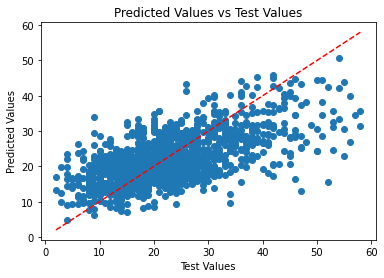

In [14]:
test_values=y_test
predicted_values=y_pred
plt.scatter(test_values, predicted_values)
plt.plot([min(test_values), max(test_values)], [min(test_values), max(test_values)], color='red', linestyle='--')  # Adding the 45-degree line
plt.xlabel('Test Values')
plt.ylabel('Predicted Values')
plt.title('Predicted Values vs Test Values')
plt.show()

In [ ]:
from sklearn.metrics import r2_score
import numpy as np
r2 = r2_score(y_test, y_pred)
r2

In [53]:
a=np.array([[1,40,2,10,20,799]])
a=scaler.transform(a)
b=model.predict(a)
b


C:\Users\basia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[16.982351]], dtype=float32)

In [14]:
model.summary() 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                576       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,801
Trainable params: 4,801
Non-trainable params: 0
_________________________________________________________________


In [13]:
from PyQt5.QtWidgets import QApplication, QWidget, QLabel, QLineEdit, QPushButton, QVBoxLayout
class PredictionGUI(QWidget): #This line defines a new class called PredictionGUI that inherits from the QWidget class. This class is a custom widget that will be used to create the user interface for the machine learning application.
    def __init__(self): #This line defines the constructor for the PredictionGUI class. The constructor is a special method that is called when an object of the class is created. It initializes the object's attributes and sets up the initial state of the widget.
        super().__init__() #This line calls the constructor of the parent class (QWidget) to initialize the widget. This is necessary because the PredictionGUI class inherits from QWidget.
        
        self.initUI() #This line calls the initUI method of the PredictionGUI class to set up the user interface for the widget. This method will contain the code that creates and configures the various GUI components (such as buttons, labels, and text boxes) that the user will interact with.
        
    def initUI(self):
        self.lbl1 = QLabel('Origin', self)
        self.lbl2 = QLabel('Month', self)
        self.lbl3 = QLabel('Week', self)
        self.lbl4 = QLabel('Weekday', self)
        self.lbl5 = QLabel('Hour', self)
        self.lbl6 = QLabel('Minute', self)
        self.lbl7 = QLabel('Price', self)
        
        self.edit1 = QLineEdit(self)
        self.edit2 = QLineEdit(self)
        self.edit3 = QLineEdit(self)
        self.edit4 = QLineEdit(self)
        self.edit5 = QLineEdit(self)
        self.edit6 = QLineEdit(self)
        self.edit7 = QLineEdit(self)
        
        self.btn = QPushButton('Predict', self)
        self.btn.clicked.connect(self.predict)
        
        vbox = QVBoxLayout()
        vbox.addWidget(self.lbl1)
        vbox.addWidget(self.edit1)
        vbox.addWidget(self.lbl2)
        vbox.addWidget(self.edit2)
        vbox.addWidget(self.lbl3)
        vbox.addWidget(self.edit3)
        vbox.addWidget(self.lbl4)
        vbox.addWidget(self.edit4)
        vbox.addWidget(self.lbl5)
        vbox.addWidget(self.edit5)
        vbox.addWidget(self.lbl6)
        vbox.addWidget(self.edit6)
        vbox.addWidget(self.lbl7)
        vbox.addWidget(self.edit7)
        vbox.addWidget(self.btn)
        
        self.setLayout(vbox)
        
        self.setGeometry(100, 100, 300, 300)
        self.setWindowTitle('Demand Prediction')
        self.show()
        
    def predict(self):
        input_data = np.array([[
            float(self.edit1.text()), 
            float(self.edit2.text()), 
            float(self.edit3.text()), 
            float(self.edit4.text()), 
            float(self.edit5.text()), 
            float(self.edit6.text()),
            float(self.edit7.text())
        ]])
        
        input
        prediction = model.predict(input_data)[0][0]
        
        self.result = QLabel(f'Prediction: {prediction:.2f}', self)
        self.result.move(100, 250)
        self.result.show()
    


In [ ]:
if __name__ == '__main__':
    app = QApplication([])
    ex = PredictionGUI()
    app.exec_()